In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report # métrica de evaluación
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder

# Análisis Exploratorio

In [2]:
df_50 = pd.read_csv('https://raw.githubusercontent.com/pokengineer/DataScience/main/datasets/adult_income.csv', header = None)
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'target']
df_50.columns = col_names
df_50.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Verificamos los tipos de datos
df_50.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
target            object
dtype: object

In [4]:
print("Tamaño del dataframe : {}".format(df_50.shape))

Tamaño del dataframe : (32561, 15)


In [5]:
# Verificamos si hay valores nulos para imputar
df_50.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
target            0
dtype: int64

target
<=50K    24720
>50K      7841
Name: count, dtype: int64


<Axes: xlabel='target', ylabel='count'>

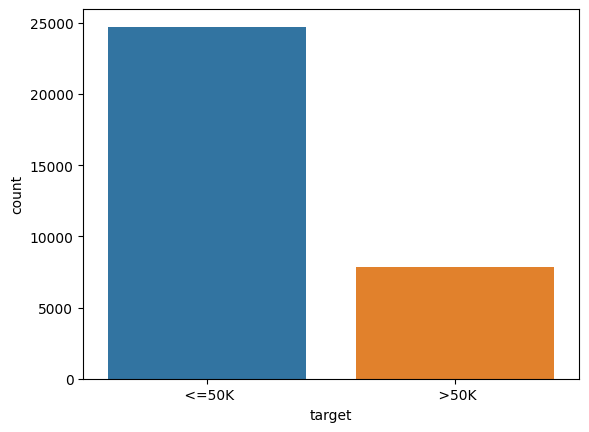

In [6]:
# Analisis de la distribución de la variable target
print( df_50.target.value_counts() )
sns.countplot(x='target', data=df_50, hue='target', legend=False)

In [7]:
# Identificamos las variables categóricas
categorical = [var for var in df_50.columns if df_50[var].dtype=='O']
print('Las variables categoricas son:\n', categorical)
print("\nChequeamos la dimensionalidad de las variables")
for var in categorical:
    print(len(df_50[var].unique()), '\tvalores unicos en\t', var )

Las variables categoricas son:
 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'target']

Chequeamos la dimensionalidad de las variables
9 	valores unicos en	 workclass
16 	valores unicos en	 education
7 	valores unicos en	 marital_status
15 	valores unicos en	 occupation
6 	valores unicos en	 relationship
5 	valores unicos en	 race
2 	valores unicos en	 sex
42 	valores unicos en	 native_country
2 	valores unicos en	 target


In [8]:
# Paso target a una variable numerica
df_50['target'] = df_50['target'].str.strip()  # quita espacios en ambos extremos
df_50['target'] = df_50['target'].apply(lambda x: 1 if x == '>50K' else 0)
print(df_50['target'].value_counts())


target
0    24720
1     7841
Name: count, dtype: int64


In [9]:
# Identificamos las variables numéricas
numerical = [var for var in df_50.columns if df_50[var].dtype!='O']
print('Las variables numéricas son:\n', numerical)

Las variables numéricas son:
 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'target']


# Correlación de Variables

<Axes: >

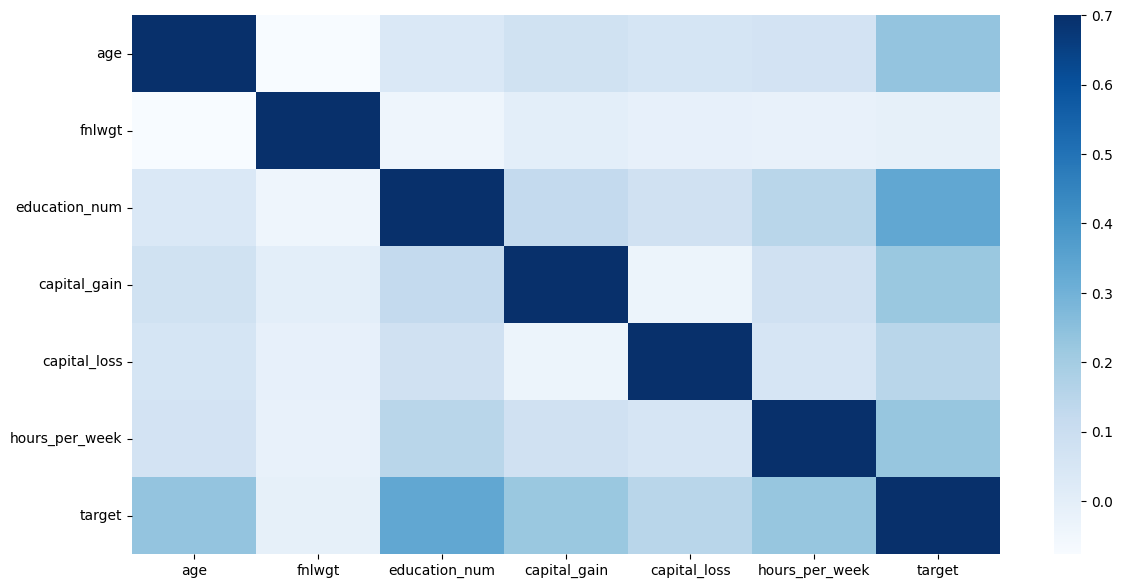

In [10]:
plt.figure(figsize=(14,7))
sns.heatmap(df_50[numerical].corr(), vmax=.7, cmap ='Blues', fmt=".2f")

In [11]:
df_corr = df_50[numerical].corr()[["target"]]*100 # Lo pasamos a porcentajes
df_corr = df_corr.drop("target", axis=0) # Eliminamos la variable target
df_corr = df_corr.sort_values(["target"], ascending=False) # Ordenamos en forma descendente
df_corr = abs(df_corr) # Nos interesa el valor absouluto
df_corr

,target
education_num,33.515395
age,23.403710
hours_per_week,22.968907
capital_gain,22.332882
capital_loss,15.052631
fnlwgt,0.946256


# Seleccionamos las variables que vamos a utilizar y hacemos el Split

In [12]:
df_50.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'target'],
      dtype='object')

In [13]:
# usamos todas las columnas numércias
df = df_50[numerical]
X = df.drop("target",axis=1)
y = df["target"]
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [14]:
# Hacemos el Split 70-30 para train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

In [15]:
# Creamos y entrenamos el clasificador bayesiano
bayes_multi = MultinomialNB()
bayes_multi.fit(X_train, y_train) # entrenamos el clasificador

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [16]:
y_pred_nb = bayes_multi.predict(X_test)

#Exactitud del modelo
print('Exactitud (accuracy) del modelo: {:.2f} %'.format(accuracy_score(y_test, y_pred_nb)*100))
print("-"*100)

# Reporte del clasificador
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_nb))

Exactitud (accuracy) del modelo: 77.93 %
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      7417
           1       0.61      0.24      0.34      2352

    accuracy                           0.78      9769
   macro avg       0.70      0.59      0.60      9769
weighted avg       0.75      0.78      0.74      9769



# Ejercicio
- ¿Hay variables redundantes en este dataframe? ¿Que variables feature engineering incluirias en este modelo?
- Reemplazar MultinomialNB por GaussianNB y comparar el desempeño.
- Usando OneHotEncoder o pd.get_dummies() en las variables categóricas de baja dimensionalidad, obtener columnas numericas para representarlas. incluirlas al modelo y comparar el resultado.

## Punto 1
¿Hay variables redundantes en este dataframe? ¿Que variables feature engineering incluirias en este modelo?

In [17]:
def mostrar_variables_correlacionadas(data_frame, umbral = 0.7):
    # Solo columnas numéricas
    matriz_de_correlacion = data_frame.select_dtypes(include = 'number').corr()

    # Evitar duplicados usando el triángulo superior de la matriz
    correlaciones_altas = []

    for i in range(len(matriz_de_correlacion.columns)):
        for j in range(i+1, len(matriz_de_correlacion.columns)):
            fila = matriz_de_correlacion.columns[i]
            columna = matriz_de_correlacion.columns[j]
            valor_correlacion = matriz_de_correlacion.iloc[i, j]
            if abs(valor_correlacion) > umbral:
                correlaciones_altas.append((fila, columna, round(valor_correlacion, 3)))

    if correlaciones_altas:
        print(f"Variables con correlación mayor a {umbral}:\n")
        for fila, columna, valor_correlacion in correlaciones_altas:
            print(f"{fila} ↔ {columna}\tCorrelación: {valor_correlacion}")
    else:
        print(f"No se encontraron pares de variables con correlación mayor a {umbral}.")

mostrar_variables_correlacionadas(df, umbral = 0.7)

No se encontraron pares de variables con correlación mayor a 0.7.


Feature engineering, creamos una columna nueva

In [18]:
df.loc[:, 'capital_net'] = df['capital_gain'] - df['capital_loss']
df

C:\Users\leand\AppData\Local\Temp\ipykernel_2640\3647736141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'capital_net'] = df['capital_gain'] - df['capital_loss']


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,target,capital_net
0,39,77516,13,2174,0,40,0,2174
1,50,83311,13,0,0,13,0,0
2,38,215646,9,0,0,40,0,0
3,53,234721,7,0,0,40,0,0
4,28,338409,13,0,0,40,0,0
...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0
32557,40,154374,9,0,0,40,1,0
32558,58,151910,9,0,0,40,0,0
32559,22,201490,9,0,0,20,0,0


## Punto 2
Reemplazar MultinomialNB por GaussianNB y comparar el desempeño.

### Usando MultinomialNB

Usamos todas las columnas numércias

In [19]:
TARGET = 'target'
df = df_50[numerical]
X = df.drop(TARGET, axis = 1)
y = df[TARGET]
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


Hacemos el Split 70-30 para train-test

In [20]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

Creamos y entrenamos el clasificador bayesiano

In [21]:
bayes_multi = MultinomialNB()
bayes_multi.fit(X_train_multi, y_train_multi)
y_pred_multi = bayes_multi.predict(X_test_multi)

Reporte del clasificador

In [22]:
print('Exactitud (accuracy) del modelo: {:.2f}%'.format(accuracy_score(y_test_multi, y_pred_multi) * 100))
print("-"*100)
print(classification_report(y_test_multi, y_pred_multi))

Exactitud (accuracy) del modelo: 77.93%
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      7417
           1       0.61      0.24      0.34      2352

    accuracy                           0.78      9769
   macro avg       0.70      0.59      0.60      9769
weighted avg       0.75      0.78      0.74      9769



### Usando GaussianNB

Usamos todas las columnas numércias

In [23]:
df = df_50[numerical]
X = df.drop(TARGET,axis = 1)
y = df[TARGET]
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


Hacemos el Split 70-30 para train-test

In [24]:
X_train_gauss, X_test_gauss, y_train_gauss, y_test_gauss = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

Creamos y entrenamos el clasificador bayesiano

In [25]:
bayes_gauss = GaussianNB()
bayes_gauss.fit(X_train_gauss, y_train_gauss)
y_pred_gauss = bayes_gauss.predict(X_test_gauss)

Reporte del clasificador

In [26]:
print('Exactitud (accuracy) del modelo: {:.2f} %'.format(accuracy_score(y_test_gauss, y_pred_gauss)*100))
print("-"*100)
print(classification_report(y_test_gauss, y_pred_gauss))

Exactitud (accuracy) del modelo: 79.55 %
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      7417
           1       0.66      0.32      0.43      2352

    accuracy                           0.80      9769
   macro avg       0.74      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



## Punto 3
Usando OneHotEncoder o pd.get_dummies() en las variables categóricas de baja dimensionalidad, obtener columnas numericas para representarlas. incluirlas al modelo y comparar el resultado.

In [27]:
oh = OneHotEncoder(sparse_output = False)
oh.fit(df[["hours_per_week"]])
oh.transform(df[["hours_per_week"]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(32561, 94))

In [28]:
oh.get_feature_names_out()

array(['hours_per_week_1', 'hours_per_week_2', 'hours_per_week_3',
       'hours_per_week_4', 'hours_per_week_5', 'hours_per_week_6',
       'hours_per_week_7', 'hours_per_week_8', 'hours_per_week_9',
       'hours_per_week_10', 'hours_per_week_11', 'hours_per_week_12',
       'hours_per_week_13', 'hours_per_week_14', 'hours_per_week_15',
       'hours_per_week_16', 'hours_per_week_17', 'hours_per_week_18',
       'hours_per_week_19', 'hours_per_week_20', 'hours_per_week_21',
       'hours_per_week_22', 'hours_per_week_23', 'hours_per_week_24',
       'hours_per_week_25', 'hours_per_week_26', 'hours_per_week_27',
       'hours_per_week_28', 'hours_per_week_29', 'hours_per_week_30',
       'hours_per_week_31', 'hours_per_week_32', 'hours_per_week_33',
       'hours_per_week_34', 'hours_per_week_35', 'hours_per_week_36',
       'hours_per_week_37', 'hours_per_week_38', 'hours_per_week_39',
       'hours_per_week_40', 'hours_per_week_41', 'hours_per_week_42',
       'hours_per_week_43', '

Vemos cuántas categorías únicas tiene cada variable categórica

In [29]:
cat_cols = df_50.select_dtypes(include = 'object').columns
for col in cat_cols:
    print(f"{col}: {df_50[col].nunique()} categorías")

workclass: 9 categorías
education: 16 categorías
marital_status: 7 categorías
occupation: 15 categorías
relationship: 6 categorías
race: 5 categorías
sex: 2 categorías
native_country: 42 categorías


Elegimos columnas categóricas de baja cardinalidad

In [30]:
categoricas_bajas = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

Convertimos a variables dummy

In [31]:
df_dummies = pd.get_dummies(df_50[categoricas_bajas], drop_first = True)

Concatenamos con el DataFrame original

In [32]:
df_modelo = pd.concat([df_50.drop(columns = categoricas_bajas), df_dummies], axis = 1)

### Sin variables dummies

Imputamos la variables target --> <=50K / >50K → 0/1

In [33]:
X = df_50.drop(columns=[TARGET])
#y = df_50[TARGET].apply(lambda x: 1 if x == '>50K' else 0)
#X = df_modelo.drop(columns=[TARGET])
y = df_50[TARGET]

print(y.value_counts())

target
0    24720
1     7841
Name: count, dtype: int64


Usamos todas las columnas numércias

In [34]:
df = df_50[numerical]
X = df.drop(TARGET,axis = 1)
y = df[TARGET]
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


Hacemos el Split 70-30 para train-test

In [35]:
X_train_gauss, X_test_gauss, y_train_gauss, y_test_gauss = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

Creamos y entrenamos el clasificador bayesiano

In [36]:
bayes_gauss = GaussianNB()
bayes_gauss.fit(X_train_gauss, y_train_gauss)
y_pred_gauss = bayes_gauss.predict(X_test_gauss)

Reporte del clasificador

In [37]:
print('Exactitud (accuracy) del modelo: {:.2f} %'.format(accuracy_score(y_test_gauss, y_pred_gauss)*100))
print("-"*100)
print(classification_report(y_test_gauss, y_pred_gauss))

Exactitud (accuracy) del modelo: 79.55 %
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      7417
           1       0.66      0.32      0.43      2352

    accuracy                           0.80      9769
   macro avg       0.74      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



### Con variables dummies

In [38]:
X_dummies = df_modelo.drop(columns=[TARGET])

División en entrenamiento y prueba

In [39]:
X_train_dummies, X_test_dummies, y_train_dummies, y_test_dummies = train_test_split(X_dummies, y, test_size=0.2, stratify=y, random_state=42)

Entrenamiento del clasificador Naive Bayes Multinomial

In [40]:
bayes_multi = MultinomialNB()
bayes_multi.fit(X_train_dummies, y_train_dummies)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


Predicciones sobre el conjunto de prueba

In [41]:
y_pred_dummies = bayes_multi.predict(X_test_dummies)

Evaluación del modelo

In [42]:
print('Exactitud (accuracy) del modelo: {:.2f} %'.format(accuracy_score(y_test_dummies, y_pred_dummies) * 100))
print("-" * 100)
print(classification_report(y_test_dummies, y_pred_dummies))

Exactitud (accuracy) del modelo: 78.32 %
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      4945
           1       0.63      0.25      0.36      1568

    accuracy                           0.78      6513
   macro avg       0.71      0.60      0.61      6513
weighted avg       0.76      0.78      0.75      6513



### Version 2 con dummies

Se obtienen las columnas con cardinalidad baja

In [43]:
cat_baja_card = [var for var in categorical if df_50[var].nunique() < 10]
df_dummies = pd.get_dummies(df_50[cat_baja_card], drop_first = True)

X_full = pd.concat([df[numerical].drop(TARGET, axis = 1), df_dummies], axis = 1)
y_full = df_50[TARGET]

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size = 0.3, stratify = y_full, random_state = 42)

bayes_full = GaussianNB()
bayes_full.fit(X_train_full, y_train_full)
y_pred_full = bayes_full.predict(X_test_full)

print("Exactitud con variables categóricas codificadas: {:.2f}%".format(accuracy_score(y_test_full, y_pred_full) * 100))
print("-"*100)
print(classification_report(y_test_full, y_pred_full))

Exactitud con variables categóricas codificadas: 79.55%
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      7417
           1       0.66      0.32      0.43      2352

    accuracy                           0.80      9769
   macro avg       0.74      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



Ver el número de columnas generadas por las variables dummy

In [44]:
num_columns_dummies = df_dummies.shape[1]
print(f"Se generaron {num_columns_dummies} columnas con variables dummy.")

Se generaron 25 columnas con variables dummy.


Asegurémonos de que 'categorical' esté definido, o si no, lo definimos

In [45]:
categorical = df_50.select_dtypes(include='object').columns

Identificar las columnas que quedaron sin dummy pero con muchas categorías (más de 10 categorías únicas)

In [46]:
cat_alta_card = [var for var in categorical if df_50[var].nunique() >= 10]

Imprimir las columnas con muchas categorías

In [47]:
print("Columnas con muchas categorías (sin dummy):", cat_alta_card)

Columnas con muchas categorías (sin dummy): ['education', 'occupation', 'native_country']


Mostrar las categorías únicas para las columnas con alta cardinalidad

In [48]:
for col in cat_alta_card:
    print(f"Categorías de {col}:")
    print(df_50[col].unique())
    print("-" * 50)

Categorías de education:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
--------------------------------------------------
Categorías de occupation:
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
--------------------------------------------------
Categorías de native_country:
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-U

### Verison 3 con agrupamiento

Agrupamos las categorías de education

In [49]:
df_50['education_grouped_2'] = df_50['education'].apply(
    lambda x: 'Bajo' if x in [' 9th', ' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' Preschool', ' 7th-8th'] else
              'Medio' if x in [' HS-grad', ' Some-college', ' Assoc-acdm', ' Assoc-voc'] else
              'Alto'
)

Agrupamos las categorías de occupation

In [50]:
df_50['occupation_grouped_2'] = df_50['occupation'].apply(
    lambda x: 'Bajo' if x in [' Adm-clerical', ' Handlers-cleaners', ' Other-service', ' Farming-fishing', ' Priv-house-serv', ' Armed-Forces'] else
              'Medio' if x in [' Tech-support', ' Machine-op-inspct', ' Transport-moving', ' Sales', ' Craft-repair', ' Protective-serv'] else
              'Alto' if x in [' Exec-managerial', ' Prof-specialty'] else
              'Desconocido'
)

Agrupamos las categorías de native_country

In [51]:
df_50['native_country_grouped_2'] = df_50['native_country'].apply(
    lambda x: 'America del Norte' if x in [' United-States', ' Canada', ' Puerto-Rico', ' Mexico'] else
              'America Latina' if x in [' Cuba', ' Jamaica', ' Honduras', ' Dominican-Republic', ' El-Salvador', ' Guatemala', ' Nicaragua', ' Trinidad&Tobago', ' Haiti'] else
              'Asia' if x in [' India', ' Philippines', ' Taiwan', ' Iran', ' China', ' Japan', ' Vietnam', ' Thailand'] else
              'Europa' if x in [' England', ' Germany', ' Italy', ' Poland', ' Portugal', ' France', ' Greece', ' Ireland', ' Hungary', ' Scotland', ' Yugoslavia', ' Holand-Netherlands'] else
              'Otros'
)

Creamos variables dummies para las nuevas columnas agrupadas

In [52]:
df_dummies_2 = pd.get_dummies(df_50[['education_grouped_2', 'occupation_grouped_2', 'native_country_grouped_2']], drop_first=True)

Concatenamos con el DataFrame original

In [53]:
df_modelo_2 = pd.concat([df_50.drop(columns=['education', 'occupation', 'native_country']), df_dummies_2], axis=1)

Definimos las columnas numéricas y la variable objetivo (TARGET)

In [54]:
numerical_2 = df_50.select_dtypes(include='number').columns.tolist()

Creamos las matrices X (features) y y (target)

In [55]:
X_full_2 = pd.concat([df_50[numerical_2].drop(TARGET, axis=1), df_dummies_2], axis=1)
y_full_2 = df_50[TARGET]

Dividimos en conjunto de entrenamiento y prueba (70% entrenamiento, 30% prueba)

In [56]:
X_train_full_2, X_test_full_2, y_train_full_2, y_test_full_2 = train_test_split(X_full_2, y_full_2, test_size=0.3, stratify=y_full_2, random_state=42)

Entrenamos el modelo Naive Bayes

In [57]:
bayes_full_2 = GaussianNB()
bayes_full_2.fit(X_train_full_2, y_train_full_2)

,priors,None
,var_smoothing,1e-09


Hacemos las predicciones sobre el conjunto de prueba

In [58]:
y_pred_full_2 = bayes_full_2.predict(X_test_full_2)

Evaluación del modelo

In [59]:
print("Exactitud con variables categóricas codificadas: {:.2f}%".format(accuracy_score(y_test_full_2, y_pred_full_2) * 100))
print("-" * 100)
print(classification_report(y_test_full_2, y_pred_full_2))

Exactitud con variables categóricas codificadas: 79.55%
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      7417
           1       0.66      0.32      0.43      2352

    accuracy                           0.80      9769
   macro avg       0.74      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769

